In [80]:
import os
import json
import random
import math
from typing import List, Dict, Any, Tuple, Optional

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt

import cv2 as cv
import mediapipe.python.solutions.hands as mp_hands

In [81]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# Data paths
IMAGES_PATH = "./images/dataset"
LABELS_PATH = "./images/dataset/landmarks_all.json"

Samples per folder: {'0': 71, '1': 71, '2': 71, '3': 71, '4': 71, '5': 71, '6': 71, '7': 71, '8': 71, '9': 71, 'a': 71, 'b': 71, 'c': 71, 'd': 71, 'e': 71, 'f': 71, 'g': 71, 'h': 71, 'i': 71, 'j': 71, 'k': 71, 'l': 71, 'm': 71, 'n': 71, 'o': 71, 'p': 71, 'q': 70, 'r': 71, 's': 71, 't': 66, 'u': 71, 'v': 71, 'w': 71, 'x': 71, 'y': 71, 'z': 71}


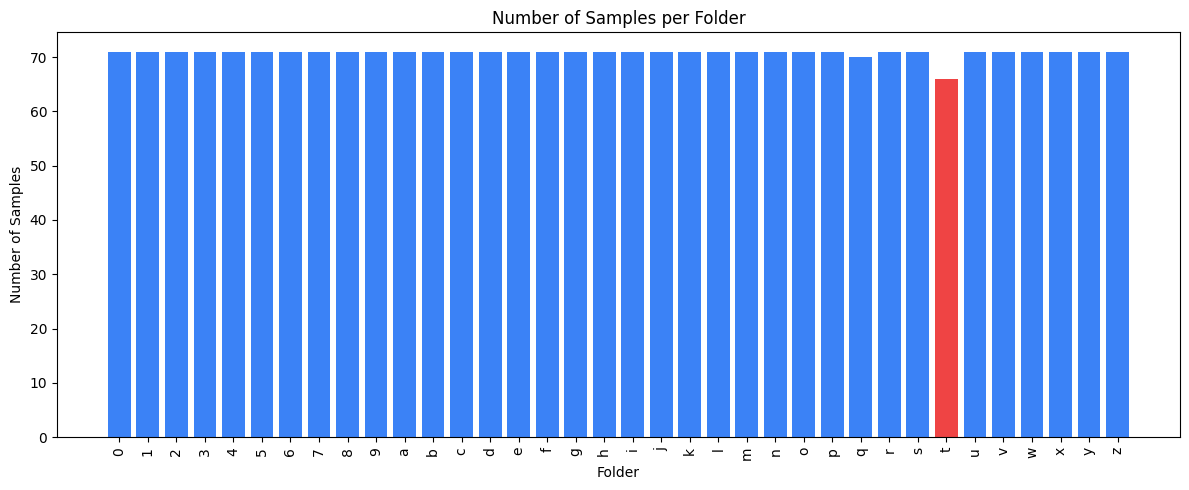

In [82]:
# Count files per subfolder under IMAGES_PATH and plot
samples_per_folder = []
for dir_name in sorted(os.listdir(IMAGES_PATH)):
    dir_path = os.path.join(IMAGES_PATH, dir_name)
    if os.path.isdir(dir_path):
        num_files = sum(
            1 for name in os.listdir(dir_path)
            if os.path.isfile(os.path.join(dir_path, name))
        )
        samples_per_folder.append((dir_name, num_files))
        
class_counts = {}
for dir_name, count in samples_per_folder:
    class_counts[dir_name] = count
print("Samples per folder:", class_counts)

# Plot the number of samples per folder
labels, counts = zip(*samples_per_folder)
x = np.arange(len(labels))
plt.figure(figsize=(12, 5))
plt.bar(x, counts, color="#3b82f6")
bar_colors = ['#ef4444' if count < 70 else '#3b82f6' for count in counts]
plt.bar(x, counts, color=bar_colors)
plt.xlabel("Folder")
plt.ylabel("Number of Samples")
plt.title("Number of Samples per Folder")
plt.xticks(x, labels, rotation=90)
plt.tight_layout()
plt.show()


Landmark counts in JSON (should match folder names):


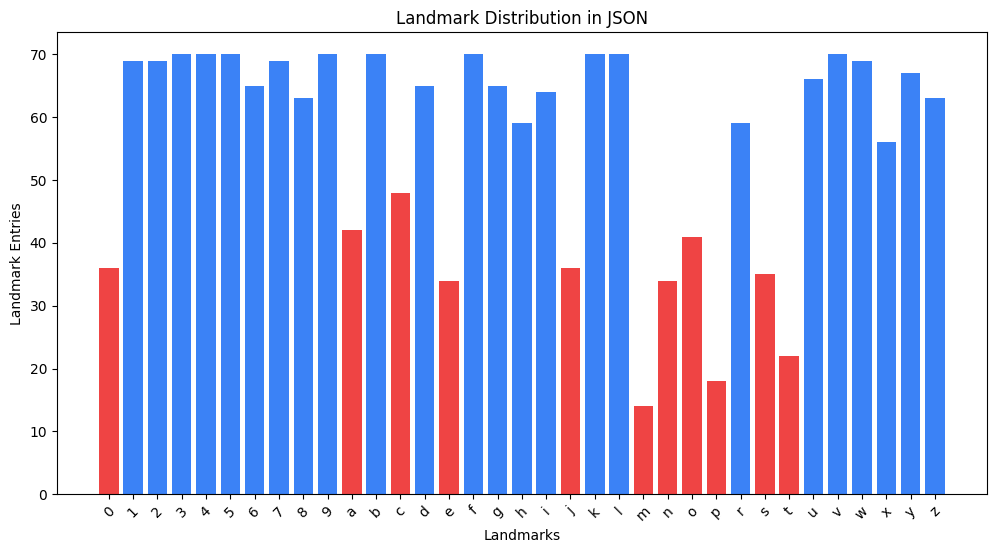

In [83]:
# Count occurrences of each label (folder name) in the merged JSON file
with open(LABELS_PATH, "r") as f:
    data = json.load(f)

landmark_counts = {}
for item in data:
    label = item.get("label")
    if label is not None:
        landmark_counts[label] = landmark_counts.get(label, 0) + 1

print("Landmark counts in JSON (should match folder names):")

# Plot the landmark distribution from the JSON file
labels, counts = zip(*sorted(landmark_counts.items()))
plt.figure(figsize=(12, 6))
plt.bar(labels, counts)
plt.xlabel("Landmarks")
bar_colors = ['#ef4444' if (count < 50) else '#3b82f6' for count in counts]
plt.bar(labels, counts, color=bar_colors)
plt.ylabel("Landmark Entries")
plt.title("Landmark Distribution in JSON")
plt.xticks(rotation=45)
plt.show()